callback을 통해서 학습을 적정 시점에 멈추거나, 
베스트 모델을 저장할 수 있습니다. 

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks

In [65]:
import tensorflow as tf

# 데이터 불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [66]:
def mnist_train(callbacks, epochs):

  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])  

  # 모델 컴파일하기
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # 모델 학습
  history = model.fit(x_train, y_train, epochs=epochs, validation_data = (x_test, y_test), 
                      callbacks = callbacks)
  
  return model, history



In [67]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.title('loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.figure()
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.legend(['train', 'test'], loc='upper left')



In [68]:
model1, history1= mnist_train(callbacks = None, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4824 - accuracy: 0.8599 - val_loss: 0.1502 - val_accuracy: 0.9552
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1540 - accuracy: 0.9542 - val_loss: 0.1073 - val_accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1116 - accuracy: 0.9677 - val_loss: 0.0869 - val_accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.0803 - val_accuracy: 0.9743
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9772 - val_loss: 0.0782 - val_accuracy: 0.9760


In [69]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9760


[0.07816269248723984, 0.9760000109672546]

In [70]:
print(history1.history)

{'loss': [0.2983468174934387, 0.1450989544391632, 0.10899204015731812, 0.08864472061395645, 0.07466671615839005], 'accuracy': [0.9136166572570801, 0.956516683101654, 0.9679333567619324, 0.9728999733924866, 0.9767000079154968], 'val_loss': [0.15020175278186798, 0.10728304088115692, 0.0869397446513176, 0.0803123265504837, 0.07816269248723984], 'val_accuracy': [0.9552000164985657, 0.9668999910354614, 0.9749000072479248, 0.9743000268936157, 0.9760000109672546]}


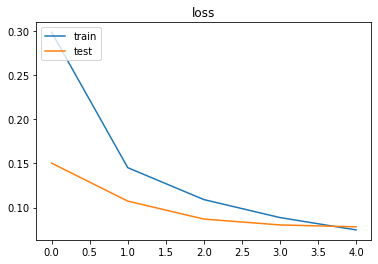

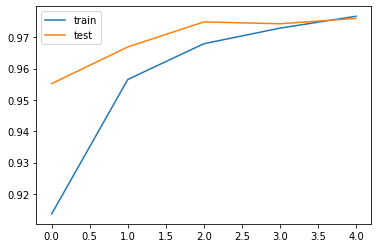

In [71]:
plot_history(history1)

EarlyStopping을 통해서 불필요하게 학습 되는 것을 방지할 수 있습니다

In [72]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model2, history2 = mnist_train(earlystop, 20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4791 - accuracy: 0.8583 - val_loss: 0.1410 - val_accuracy: 0.9579
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1498 - accuracy: 0.9550 - val_loss: 0.0991 - val_accuracy: 0.9690
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9672 - val_loss: 0.0923 - val_accuracy: 0.9732
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0901 - accuracy: 0.9726 - val_loss: 0.0827 - val_accuracy: 0.9756
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9763 - val_loss: 0.0740 - val_accuracy: 0.9783
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0640 - accuracy: 0.9802 - val_loss: 0.0712 - val_accuracy: 0.9776
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9814 - val_loss: 0.0695 - val_accuracy:

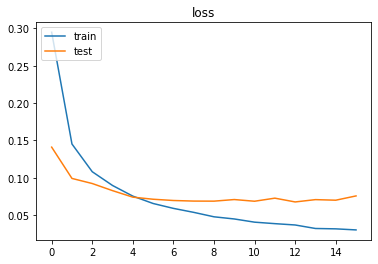

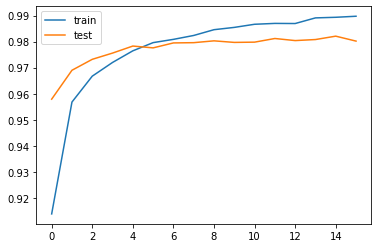

In [73]:
plot_history(history2)

In [74]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0757 - accuracy: 0.9802


[0.07566877454519272, 0.9801999926567078]

ModelCheckpoint callback을 통해서
학습 중간의 학습값을 (weights)를 저장할 수 있습니다

In [75]:
checkpoint_path = '/tmp/checkpoint/models3'

In [76]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

In [77]:
model3, history3 = mnist_train(checkpoint, 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4941 - accuracy: 0.8544 - val_loss: 0.1415 - val_accuracy: 0.9585
INFO:tensorflow:Assets written to: /tmp/checkpoint/models3/assets
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1494 - accuracy: 0.9562 - val_loss: 0.0992 - val_accuracy: 0.9695
INFO:tensorflow:Assets written to: /tmp/checkpoint/models3/assets
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107 - accuracy: 0.9666 - val_loss: 0.0860 - val_accuracy: 0.9734
INFO:tensorflow:Assets written to: /tmp/checkpoint/models3/assets
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9733 - val_loss: 0.0754 - val_accuracy: 0.9768
INFO:tensorflow:Assets written to: /tmp/checkpoint/models3/assets
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0758 - accuracy: 0.9761 - val_loss: 0.0737 - val_accuracy: 0.9780
INFO:tensorflow:

In [78]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9804


[0.07689233869314194, 0.980400025844574]

In [79]:
!ls '/tmp/checkpoint'

models	models3


In [80]:
model3_best = tf.keras.models.load_model('/tmp/checkpoint/models3')

In [81]:
model3_best.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0709 - accuracy: 0.9794


[0.07093656063079834, 0.9793999791145325]

In [82]:
checkpoint_path = '/tmp/checkpoint/models4'
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

model4, history4 = mnist_train([earlystop, checkpoint], 10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4744 - accuracy: 0.8634 - val_loss: 0.1398 - val_accuracy: 0.9572
INFO:tensorflow:Assets written to: /tmp/checkpoint/models4/assets
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1592 - accuracy: 0.9536 - val_loss: 0.1062 - val_accuracy: 0.9690
INFO:tensorflow:Assets written to: /tmp/checkpoint/models4/assets
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1087 - accuracy: 0.9685 - val_loss: 0.0881 - val_accuracy: 0.9725
INFO:tensorflow:Assets written to: /tmp/checkpoint/models4/assets
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9735 - val_loss: 0.0791 - val_accuracy: 0.9753
INFO:tensorflow:Assets written to: /tmp/checkpoint/models4/assets
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0758 - accuracy: 0.9764 - val_loss: 0.0745 - val_accuracy: 0.9780
INFO:tensorflow:

In [83]:
model4_best = tf.keras.models.load_model('/tmp/checkpoint/models4')

In [84]:
model4_best.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0673 - accuracy: 0.9806


[0.06730932742357254, 0.9805999994277954]

In [85]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)
model5, history5 = mnist_train(earlystop, 20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4745 - accuracy: 0.8643 - val_loss: 0.1402 - val_accuracy: 0.9579
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1502 - accuracy: 0.9547 - val_loss: 0.1058 - val_accuracy: 0.9662
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1097 - accuracy: 0.9672 - val_loss: 0.0878 - val_accuracy: 0.9734
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9733 - val_loss: 0.0761 - val_accuracy: 0.9769
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9765 - val_loss: 0.0766 - val_accuracy: 0.9767
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9791 - val_loss: 0.0803 - val_accuracy: 0.9754
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9830 - val_loss: 0.0756 - val_accuracy:

In [86]:
model5.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9822


[0.06863104552030563, 0.982200026512146]

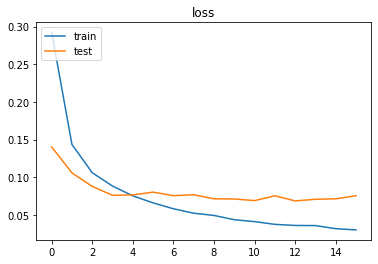

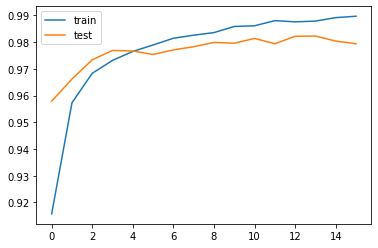

In [87]:
plot_history(history5)